In [11]:
import os
import pandas as pd
%matplotlib inline

In [19]:
import nltk
nltk.download('vader_lexicon')
from nltk.sentiment.vader import SentimentIntensityAnalyzer
analyzer = SentimentIntensityAnalyzer()

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\Roger.Lopez\AppData\Roaming\nltk_data...


# News Headlines Sentiment

Use the news api to pull the latest news articles for bitcoin and ethereum and create a DataFrame of sentiment scores for each coin. 

Use descriptive statistics to answer the following questions:
1. Which coin had the highest mean positive score?
2. Which coin had the highest negative score?
3. Which coin had the highest positive score?

In [13]:
from newsapi import NewsApiClient
#from newsapi.newsapi_client import NewsApiClient

In [39]:
# Read your api key environment variable
api_key = os.getenv('NEWS_API_KEY')

In [40]:
# Create a newsapi client
newsapi = NewsApiClient(api_key=api_key)

In [41]:
# Fetch the Bitcoin news articles
btc_news = newsapi.get_everything(q="Bitcoin AND btc", language="en", sort_by="relevancy")

In [42]:
# Fetch the Ethereum news articles
eth_news = newsapi.get_everything(q="Ethereum AND eth", language="en", sort_by="relevancy")

In [43]:
btc_sentiments = []

for article in btc_news["articles"]:
    try:
        sentiment = analyzer.polarity_scores(article["content"])
      
        btc_sentiments.append({
            "raw_article": article["content"],
            "compound": sentiment["compound"],
            "positive": sentiment["pos"],
            "negative": sentiment["neg"],
            "neutral": sentiment["neu"]
            
        })
        
    except AttributeError:
        pass
    
# Create DataFrame
btc_df = pd.DataFrame(btc_sentiments)

# Reorder DataFrame columns
cols = ["raw_article", "compound", "positive", "negative", "neutral"]
btc_df = btc_df[cols]

btc_df.head()

,raw_article,compound,positive,negative,neutral
0,Our robot colleague Satoshi Nakaboto writes ab...,0.5070,0.067,0.000,0.933
1,Our robot colleague Satoshi Nakaboto writes ab...,0.2911,0.065,0.042,0.893
2,"Welcome to Hard Fork Basics, a collection of t...",0.7783,0.179,0.060,0.761
3,"Bakkt, the Bitcoin Futures Trading, and Digita...",0.1779,0.044,0.000,0.956
4,"Ohio, the first US state to accept Bitcoin BTC...",-0.3182,0.116,0.162,0.721


In [44]:
# Create the Bitcoin sentiment scores DataFrame

In [45]:
eth_sentiments = []

for article in eth_news["articles"]:
    try:
        sentiment = analyzer.polarity_scores(article["content"])
      
        eth_sentiments.append({
            "raw_article": article["content"],
            "compound": sentiment["compound"],
            "positive": sentiment["pos"],
            "negative": sentiment["neg"],
            "neutral": sentiment["neu"]
            
        })
        
    except AttributeError:
        pass
    
# Create DataFrame
eth_df = pd.DataFrame(eth_sentiments)

# Reorder DataFrame columns
cols = [ "raw_article", "compound", "positive", "negative", "neutral"]
eth_df = eth_df[cols]

eth_df.head()

,raw_article,compound,positive,negative,neutral
0,"he plaBy now, you should almost certainly know...",0.4601,0.085,0.000,0.915
1,"Further to its previous blockchain exploits, t...",0.1027,0.063,0.054,0.882
2,"MakerDAO, the decentralized organization that ...",-0.8232,0.055,0.210,0.735
3,"Australias Perth Mint, one of the worlds large...",0.2500,0.056,0.033,0.911
4,The total transactional volume of blockchain a...,-0.5095,0.032,0.082,0.886


In [46]:
# Create the ethereum sentiment scores DataFrame

In [47]:
btc_df.describe()

,compound,positive,negative,neutral
count,20.000000,20.000000,20.000000,20.000000
mean,0.399750,0.076050,0.021500,0.902400
std,0.333399,0.034869,0.044758,0.059609
min,-0.612400,0.000000,0.000000,0.721000
25%,0.453025,0.067000,0.000000,0.886000
50%,0.507000,0.068000,0.000000,0.931500
75%,0.507000,0.070250,0.010500,0.932250
max,0.778300,0.179000,0.162000,0.956000


In [48]:
# Describe the Bitcoin Sentiment

In [49]:
eth_df.describe()

,compound,positive,negative,neutral
count,20.000000,20.000000,20.000000,20.000000
mean,0.122250,0.042800,0.020550,0.936650
std,0.352949,0.043689,0.049951,0.071244
min,-0.823200,0.000000,0.000000,0.735000
25%,0.000000,0.000000,0.000000,0.904750
50%,0.051350,0.048500,0.000000,0.943500
75%,0.381800,0.064000,0.008000,1.000000
max,0.659700,0.144000,0.210000,1.000000


In [50]:
# Describe the Ethereum Sentiment

### Questions:

Q: Which coin had the highest mean positive score?

A: Bitcoin

Q: Which coin had the highest compound score?

A: Bitcoin 

Q. Which coin had the highest positive score?

A: Bitcoin

---

# Tokenizer

In this section, you will use NLTK and Python to tokenize the text for each coin. Be sure to:
1. Lowercase each word
2. Remove Punctuation
3. Remove Stopwords

In [51]:
from nltk.tokenize import word_tokenize, sent_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer, PorterStemmer
from string import punctuation
import re
import nltk
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\rolop\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [52]:
# Expand the default stop words list if necessary
#list_stopwords = ['',',','`','bitcoin', 'cryptocurrency'] 
# do not necessarily need this for a BITCOIN word cloud.. others showed up in the word cloud...

In [53]:
def tokenizer(text):
    
    #create list
    text = word_tokenize(text)
    
    #covert to lowercase
    text = [word.lower() for word in text]
    
    #remove punctuation
    regex = re.compile("[^a-zA-Z ]")
    text = [regex.sub('', word) for word in text]
    
    # Remove the stop words
    sw = set(stopwords.words('english'))
    
    # Lemmatize Words into root words
    lem = WordNetLemmatizer() #root words
    text = [lem.lemmatize(word) for word in text]
    text = [word for word in text if word not in sw]
    
    return text

In [54]:
# Complete the tokenizer function

    # Create a list of the words

    # Convert the words to lowercase
    
    # Remove the punctuation
    
    # Remove the stop words
    
    # Lemmatize Words into root words
    

In [55]:
btc_df.raw_article

0     Our robot colleague Satoshi Nakaboto writes ab...
1     Our robot colleague Satoshi Nakaboto writes ab...
2     Welcome to Hard Fork Basics, a collection of t...
3     Bakkt, the Bitcoin Futures Trading, and Digita...
4     Ohio, the first US state to accept Bitcoin BTC...
5     Our robot colleague Satoshi Nakaboto writes ab...
6     A hacker is holding computer systems belonging...
7     Our robot colleague Satoshi Nakaboto writes ab...
8     Our robot colleague Satoshi Nakaboto writes ab...
9     Our robot colleague Satoshi Nakaboto writes ab...
10    Our robot colleague Satoshi Nakaboto writes ab...
11    Our robot colleague Satoshi Nakaboto writes ab...
12    Our robot colleague Satoshi Nakaboto writes ab...
13    Our robot colleague Satoshi Nakaboto writes ab...
14    Our robot colleague Satoshi Nakaboto writes ab...
15    Our robot colleague Satoshi Nakaboto writes ab...
16    Our robot colleague Satoshi Nakaboto writes ab...
17    Our robot colleague Satoshi Nakaboto write

In [56]:
btc_token = []
[btc_token.append(tokenizer(text)) for text in btc_df.raw_article]   
btc_df['Token'] = btc_token
btc_df.head()

,raw_article,compound,positive,negative,neutral,Token
0,Our robot colleague Satoshi Nakaboto writes ab...,0.5070,0.067,0.000,0.933,"[robot, colleague, satoshi, nakaboto, writes, ..."
1,Our robot colleague Satoshi Nakaboto writes ab...,0.2911,0.065,0.042,0.893,"[robot, colleague, satoshi, nakaboto, writes, ..."
2,"Welcome to Hard Fork Basics, a collection of t...",0.7783,0.179,0.060,0.761,"[welcome, hard, fork, basic, , collection, tip..."
3,"Bakkt, the Bitcoin Futures Trading, and Digita...",0.1779,0.044,0.000,0.956,"[bakkt, , bitcoin, future, trading, , digital,..."
4,"Ohio, the first US state to accept Bitcoin BTC...",-0.3182,0.116,0.162,0.721,"[ohio, , first, u, state, accept, bitcoin, btc..."


In [57]:
# Create a new tokens column for bitcoin

In [58]:
eth_token = []
[eth_token.append(tokenizer(text)) for text in eth_df.raw_article]   
eth_df['Token'] = eth_token
eth_df.head()

,raw_article,compound,positive,negative,neutral,Token
0,"he plaBy now, you should almost certainly know...",0.4601,0.085,0.000,0.915,"[plaby, , almost, certainly, know, ethereum, ,..."
1,"Further to its previous blockchain exploits, t...",0.1027,0.063,0.054,0.882,"[previous, blockchain, exploit, , united, nati..."
2,"MakerDAO, the decentralized organization that ...",-0.8232,0.055,0.210,0.735,"[makerdao, , decentralized, organization, run,..."
3,"Australias Perth Mint, one of the worlds large...",0.2500,0.056,0.033,0.911,"[australia, perth, mint, , one, world, largest..."
4,The total transactional volume of blockchain a...,-0.5095,0.032,0.082,0.886,"[total, transactional, volume, blockchain, app..."


In [59]:
# Create a new tokens column for ethereum

---

# NGrams and Frequency Analysis

In this section you will look at the ngrams and word frequency for each coin. 

1. Use NLTK to produce the n-grams for N = 2. 
2. List the top 10 words for each coin. 

In [8]:
from collections import Counter
from nltk.corpus import reuters, stopwords
from nltk.util import ngrams
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
import re

In [61]:
btc_counts = [Counter(ngrams(tokens, n=2)) for tokens in btc_df.Token]
dict(btc_counts[0].most_common(10))

{('satoshi', 'nakaboto'): 2,
 ('', ''): 2,
 ('robot', 'colleague'): 1,
 ('colleague', 'satoshi'): 1,
 ('nakaboto', 'writes'): 1,
 ('writes', 'bitcoin'): 1,
 ('bitcoin', 'btc'): 1,
 ('btc', 'every'): 1,
 ('every', 'fucking'): 1,
 ('fucking', 'day'): 1}

In [62]:
eth_counts = [Counter(ngrams(tokens, n=2)) for tokens in eth_df.Token]
dict(eth_counts[0].most_common(10))

{('', ''): 3,
 ('plaby', ''): 1,
 ('', 'almost'): 1,
 ('almost', 'certainly'): 1,
 ('certainly', 'know'): 1,
 ('know', 'ethereum'): 1,
 ('ethereum', ''): 1,
 ('', 'eth'): 1,
 ('eth', 'second'): 1,
 ('second', 'largest'): 1}

# Word Clouds

In this section, you will generate word clouds for each coin to summarize the news for each coin

In [9]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
plt.style.use('seaborn-whitegrid')
import matplotlib as mpl
mpl.rcParams['figure.figsize'] = [20.0, 10.0]

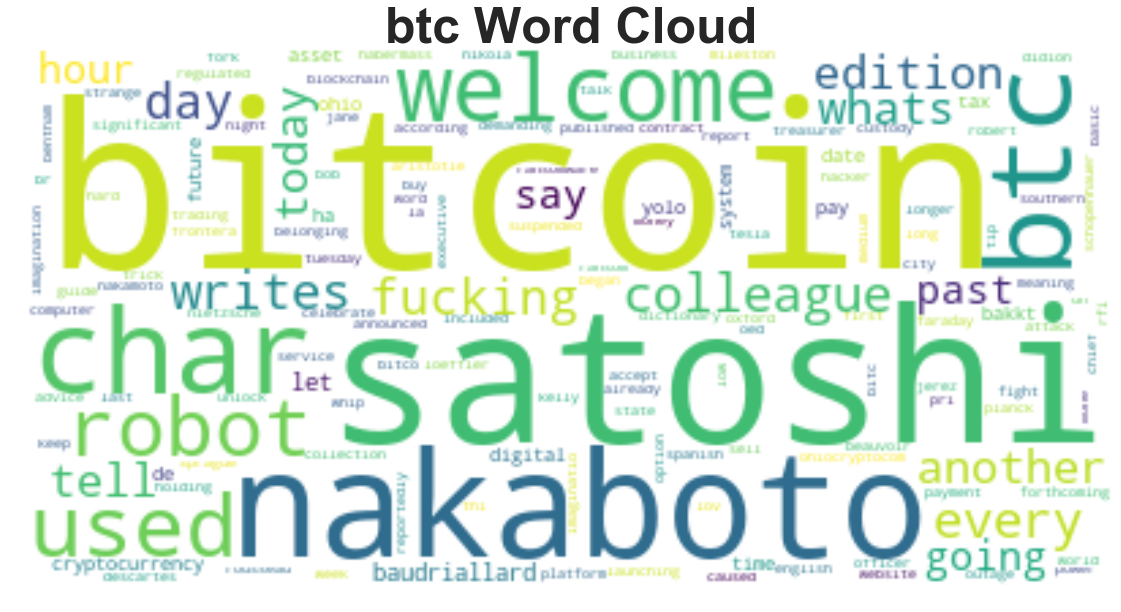

In [64]:
btc_cloud = ''
for token in btc_df.raw_article:
    btc_cloud += token
str1 = " ".join(str(x) for x in tokenizer(btc_cloud))
wc = WordCloud(collocations=False, background_color='white').generate(str1) 
#not getting rid of common words called to this function tokenizer...
plt.title('btc Word Cloud', fontsize=50, fontweight='bold')
plt.style.use('seaborn-whitegrid')
plt.imshow(wc, interpolation='bilinear')
plt.axis("off")
plt.show()

In [65]:
# Generate the Bitcoin word cloud

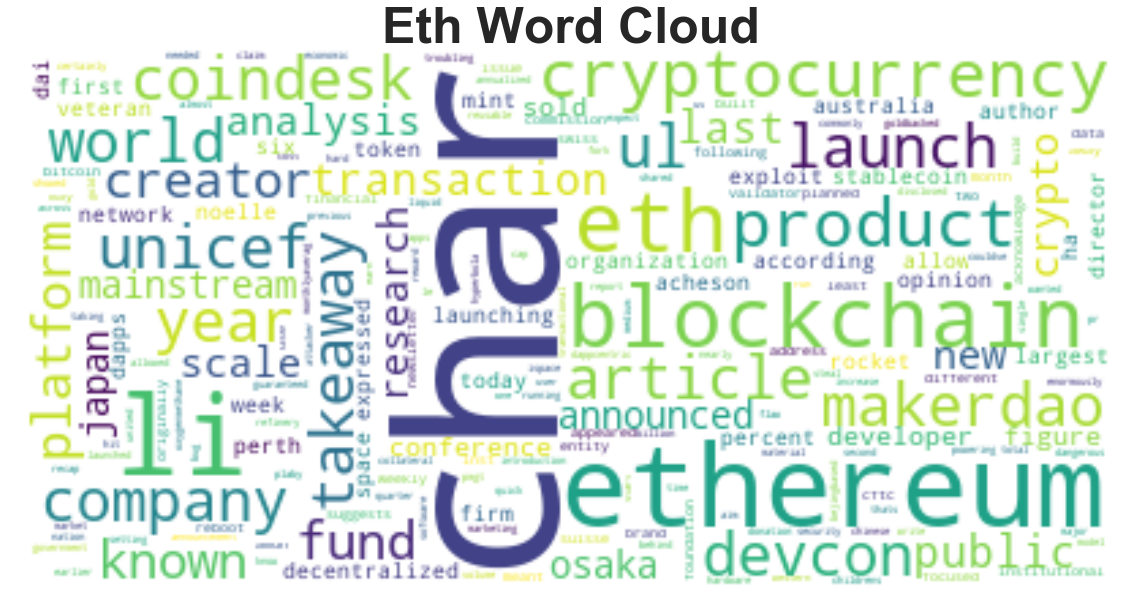

In [66]:
# Generate the Ethereum word cloud
eth_cloud = ''
for token in eth_df.raw_article:
    eth_cloud += token
str1 = " ".join(str(x) for x in tokenizer(eth_cloud))
wc = WordCloud(collocations=False, background_color='white').generate(str1) 
#not getting rid of common words called to this function tokenizer...
plt.title('Eth Word Cloud', fontsize=50, fontweight='bold')
plt.style.use('seaborn-whitegrid')
plt.imshow(wc, interpolation='bilinear')
plt.axis("off")
plt.show()

# Named Entity Recognition

In this section, you will build a named entity recognition model for both coins and visualize the tags using SpaCy.

In [10]:
import spacy
from spacy import displacy

In [68]:
# Optional - download a language model for SpaCy
# !python -m spacy download en_core_web_sm

In [69]:
# Load the spaCy model
nlp = spacy.load('en_core_web_sm')

## Bitcoin NER

In [71]:
btc_cloud

'Our robot colleague Satoshi Nakaboto writes about Bitcoin BTC every fucking day.\r\nWelcome to another edition of Bitcoin Today, where I, Satoshi Nakaboto, tell you whats been going on with Bitcoin in the past 24 hours. As Rousseau used to say: Lets get this br… [+2873 chars]Our robot colleague Satoshi Nakaboto writes about Bitcoin BTC every fucking day.\r\nWelcome to another edition of Bitcoin Today, where I, Satoshi Nakaboto, tell you whats been going on with Bitcoin in the past 24 hours. As de Beauvoir used to say: Buy low, sell… [+2883 chars]Welcome to Hard Fork Basics, a collection of tips, tricks, guides, and advice to keep you up to date in the cryptocurrency and blockchain world.\r\nLast week, the Oxford English Dictionary (OED) included the word Satoshi.\r\nTo celebrate this significant mileston… [+2717 chars]Bakkt, the Bitcoin Futures Trading, and Digital Assets custody platform have announced the launching date of its forthcoming and regulated options contract for bitcoin (

In [84]:
# Concatenate all of the bitcoin text together

In [72]:
# Run the NER processor on all of the text
btc_ner = nlp(btc_cloud)
btc_ner.user_data["title"] = "Bitcoin NER"
# Add a title to the document

In [73]:
displacy.render(btc_ner, style='ent')

In [74]:
# Render the visualization

In [75]:
btc_ents = set([ent.text for ent in btc_ner.ents ])
btc_ents #not perfect but is pulling what it considers entities

{'+2872',
 '+2975 chars]Our',
 '+2981',
 '+3352 chars]Our',
 'Aristotle',
 'BTC',
 'Bakkts',
 'Baudriallard',
 'Bentham',
 'Bitc',
 'Bitco',
 'Bitcoin',
 'Bitcoin BTC',
 'Bitcoin Pri',
 'Digital',
 'Faraday',
 'Hard Fork Basics',
 'Jane Didion',
 'Jerez de la Frontera',
 'Kelly Loeffler',
 'Last week',
 'Nietzsche',
 'Nikola Tesla',
 'OED',
 'Ohio',
 'Planck',
 'RFI',
 'Robert Sprague',
 'Rousseau',
 'Satoshi',
 'Satoshi Nakaboto',
 'Satoshi Nakamoto',
 'Schopenhauer',
 'Spanish',
 'Time',
 'Today',
 'Tuesday',
 'US',
 'Yolo',
 'de Beauvoir',
 'first',
 'night',
 'the Bitcoin Futures Trading',
 'the Oxford English Dictionary',
 'the past 24 hours'}

In [89]:
# List all Entities

---

## Ethereum NER

In [76]:
eth_cloud

'he plaBy now, you should almost certainly know about Ethereum, ETH the second largest cryptocurrency by market cap. But if you needed a quick recap, here it is.\r\nEthereums creators wanted to build a platform that would allow users all over the world to write … [+7608 chars]Further to its previous blockchain exploits, the United Nations Childrens Fund, more commonly known as UNICEF, is now taking donations in cryptocurrency.\r\nAccording to an announcement earlier today, UNICEF is setting up a cryptocurrency fund so that it can re… [+2245 chars]MakerDAO, the decentralized organization that runs on Ethereum, ETH has disclosed an enormously dangerous security flaw that couldve allowed an attacker to steal\xa0all of the\xa0collateral\xa0powering its Dai\xa0stablecoin with a single transaction.\r\nThe bug, if exploit… [+2233 chars]Australias Perth Mint, one of the worlds largest refineries, is today launching a gold-backed Ethereum ETH token guaranteed by the government of Western Austra

In [91]:
# Concatenate all of the bitcoin text together

In [77]:
# Run the NER processor on all of the text
eth_ner = nlp(eth_cloud)
eth_ner.user_data["title"] = "Ethereum NER"
# Add a title to the document

In [78]:
displacy.render(eth_ner, style='ent')

In [79]:
# Render the visualization

In [80]:
eth_ents = ([ent.text for ent in eth_ner.ents ])
set(eth_ents)

{'+13964',
 '+2233 chars]Australias Perth Mint',
 '12.2',
 '148',
 '2.0',
 '2021',
 '25',
 '3,500',
 '4.610.3 percent',
 '7,300',
 'Acheson',
 'Amun Bitcoin Suisse BTC/ETH',
 'Amun\xa0',
 'Bejing',
 'Bitcoin Suisse',
 'Bryce Harper',
 'CFTC',
 'Chinese',
 'Clayton Kershaw',
 'CoinDesk',
 'CoinDesks Director of Research',
 'DAI',
 'Dai\xa0',
 'December',
 'Devcon',
 'Devcon 5',
 'ETH',
 'ETP',
 'Eth 2',
 'Ethereum',
 'Ethereum ETH',
 'Fintech',
 'Foundation',
 'Hard Fork',
 'Heath Tarbert',
 'Japan',
 'LA Dodgers',
 'Nov. 18',
 'Osaka',
 'Q3 of this year',
 'Rune Christensen',
 'SIX',
 'Swiss',
 'Thousands',
 'Thursday',
 'UNICEF',
 'Wednesday',
 'Western Australia',
 'at least two years',
 'chars]A 2018',
 'first',
 'just $2.03 billion',
 'last quarter',
 'last week',
 'nearly 40 percent',
 'next month',
 'one',
 'second',
 'six',
 'the Commodity Futures Trading Commission',
 'the Ethereum Foundation',
 'the Perth Mint Gold Token',
 'the United Nations Childrens Fund',
 'the early mont

In [ ]:
# List all Entities
#list